In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

### Nace Codes

These are the right NACE Codes for our test reports. Note that usually multiple codes are right!

In [9]:
NACE_codes = {
    "adidas-ar23.csv": "C",
    "bayer-annual-report-2023-2.csv": "C",
    "conti_annual-report-2023-data.csv": "C",
    "Deutsche_Annual-Report-2023.csv": "K",
    "heidelberg-materials_2023.csv": "B",
    "mercedes-benz-annual-report-2023-incl-combined-management-report-mbg-ag-2.csv": "G",
    "rheinmetall-ag_2023.csv": "C",
    "Siemens-Annual-Report-2023.csv": "C",
    "thyssenkrupp-GB_2023-2024_EN_WEB.csv": "C",
    "Zalando-SE_DE_241203_s.csv": "C"
}

### Load Sentence Similarities

In [10]:
paragraph_similarities = glob.glob("paragraph_similarities/*.csv")
paragraph_similarities

['paragraph_similarities/rheinmetall-ag_2023.csv',
 'paragraph_similarities/conti_annual-report-2023-data.csv',
 'paragraph_similarities/heidelberg-materials_2023.csv',
 'paragraph_similarities/Siemens-Annual-Report-2023.csv',
 'paragraph_similarities/thyssenkrupp-GB_2023-2024_EN_WEB.csv',
 'paragraph_similarities/Zalando-SE_DE_241203_s.csv',
 'paragraph_similarities/Deutsche_Annual-Report-2023.csv',
 'paragraph_similarities/bayer-annual-report-2023-2.csv',
 'paragraph_similarities/adidas-ar23.csv',
 'paragraph_similarities/mercedes-benz-annual-report-2023-incl-combined-management-report-mbg-ag-2.csv']

In [11]:
df_paragraph_similarities = [[os.path.basename(file).split(".")[0], pd.read_csv(file)] for file in paragraph_similarities]

### Visualize mean scores

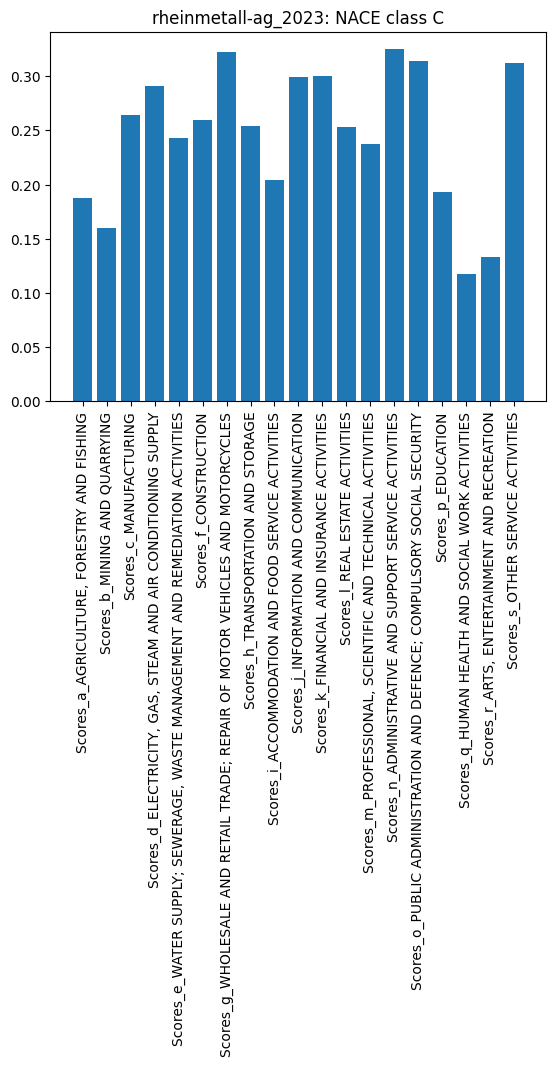

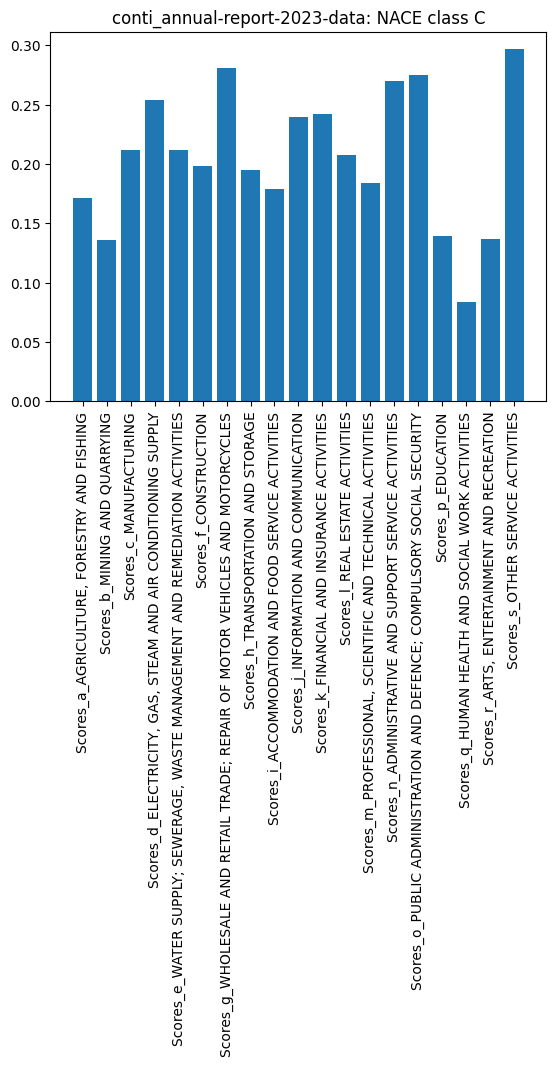

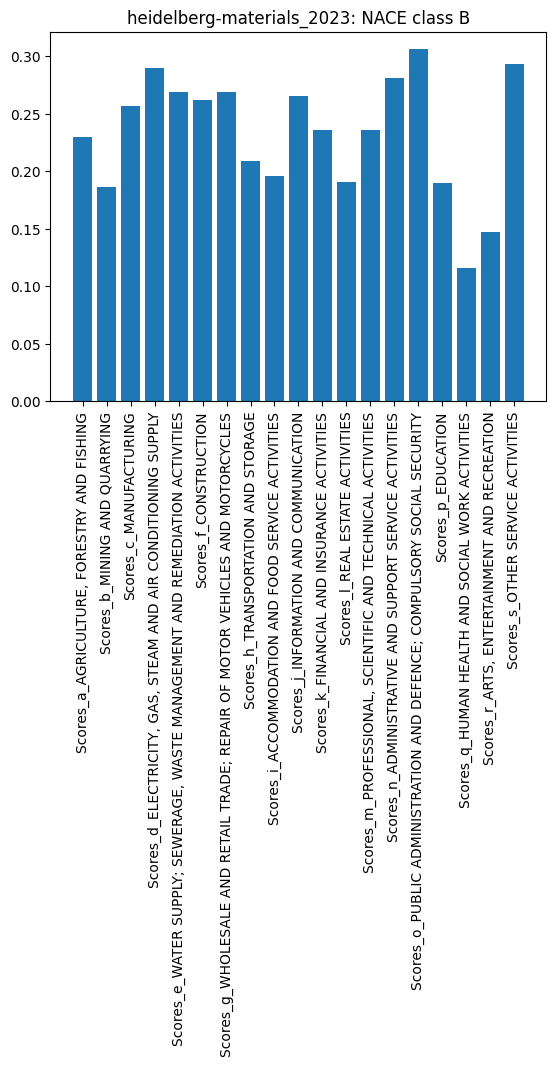

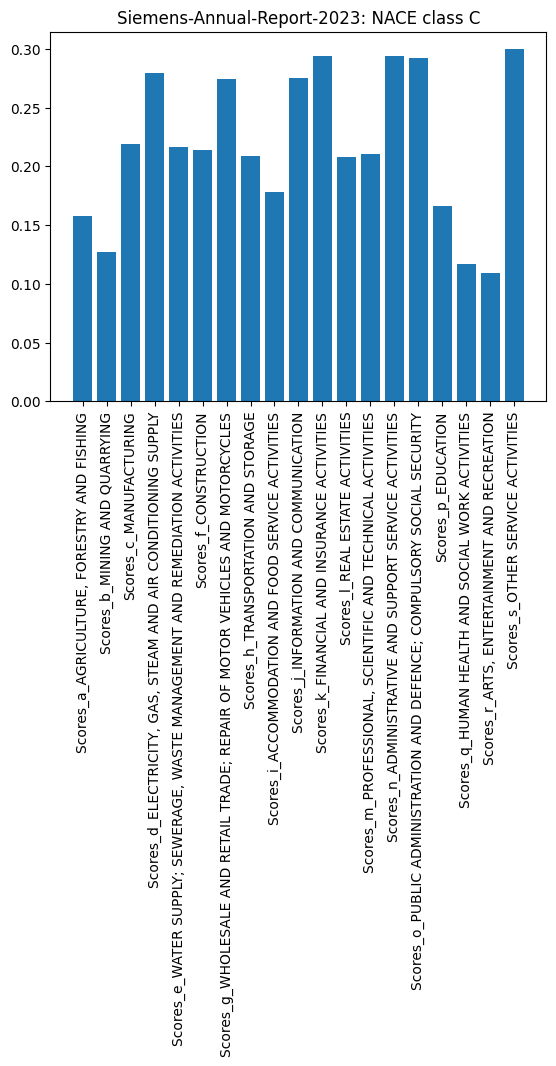

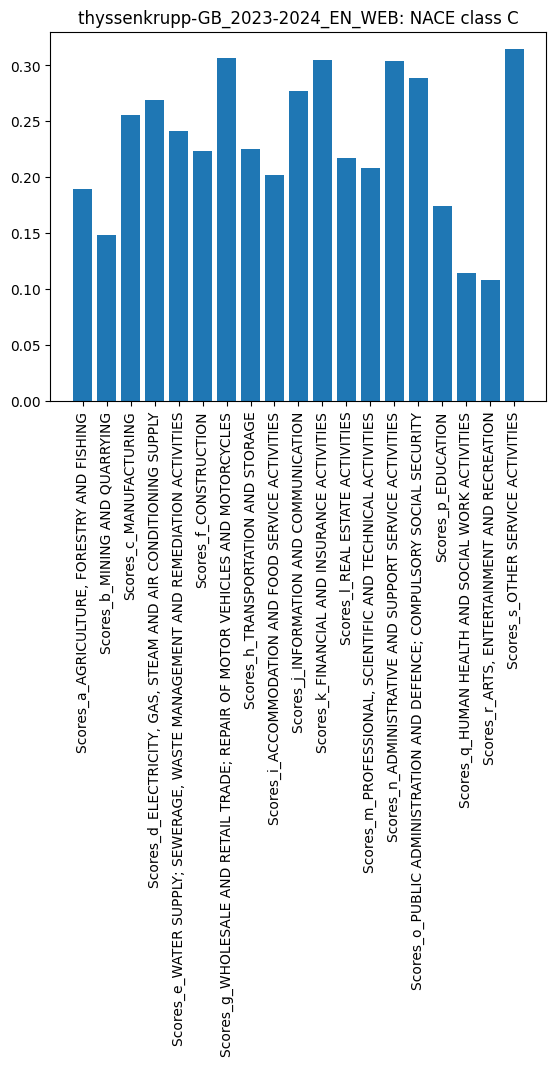

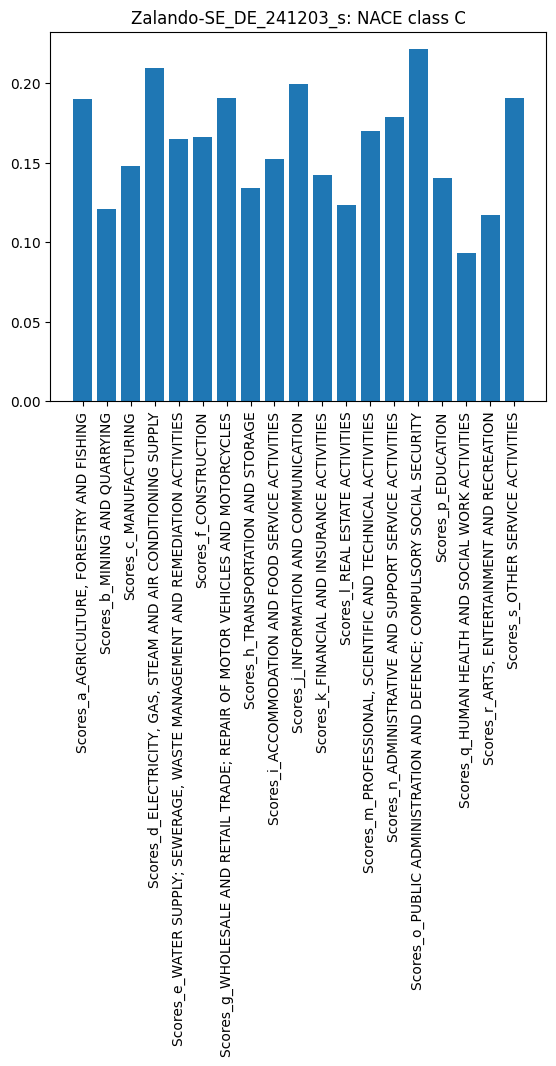

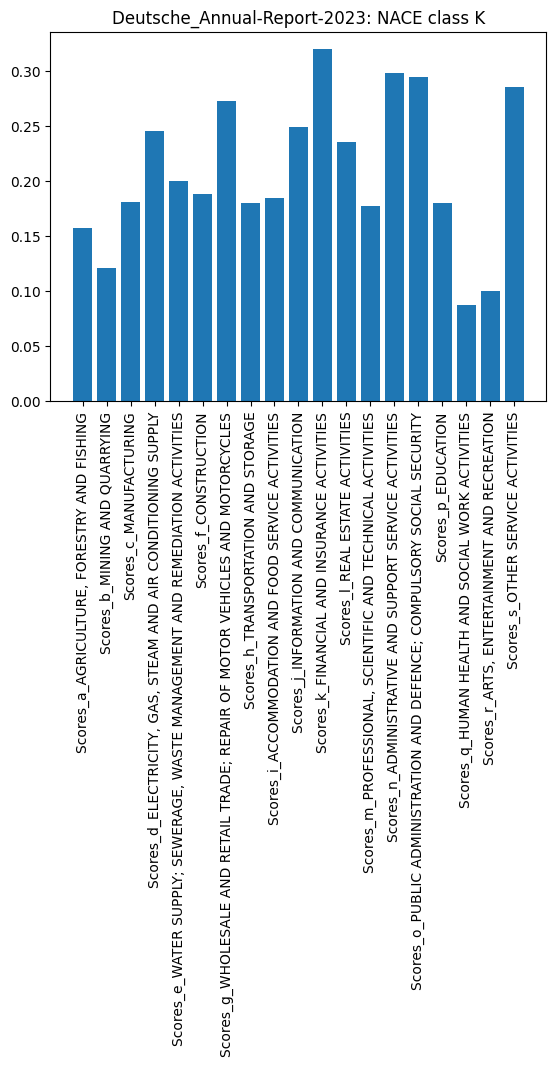

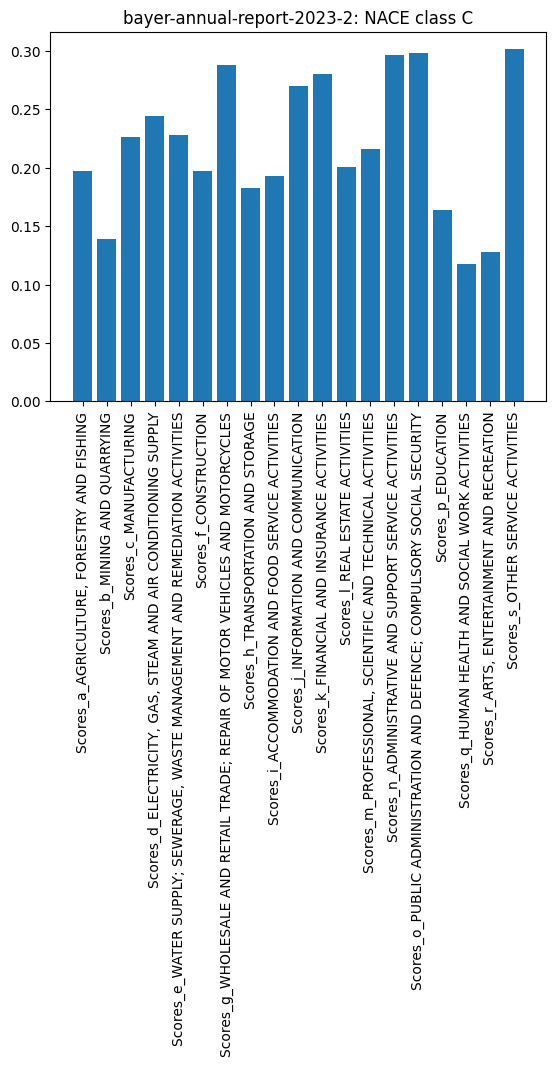

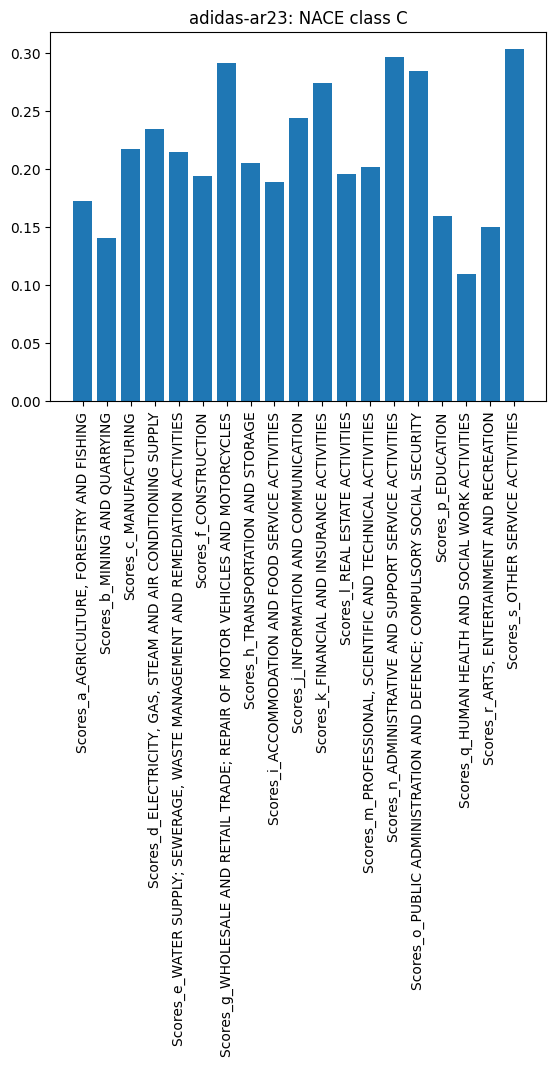

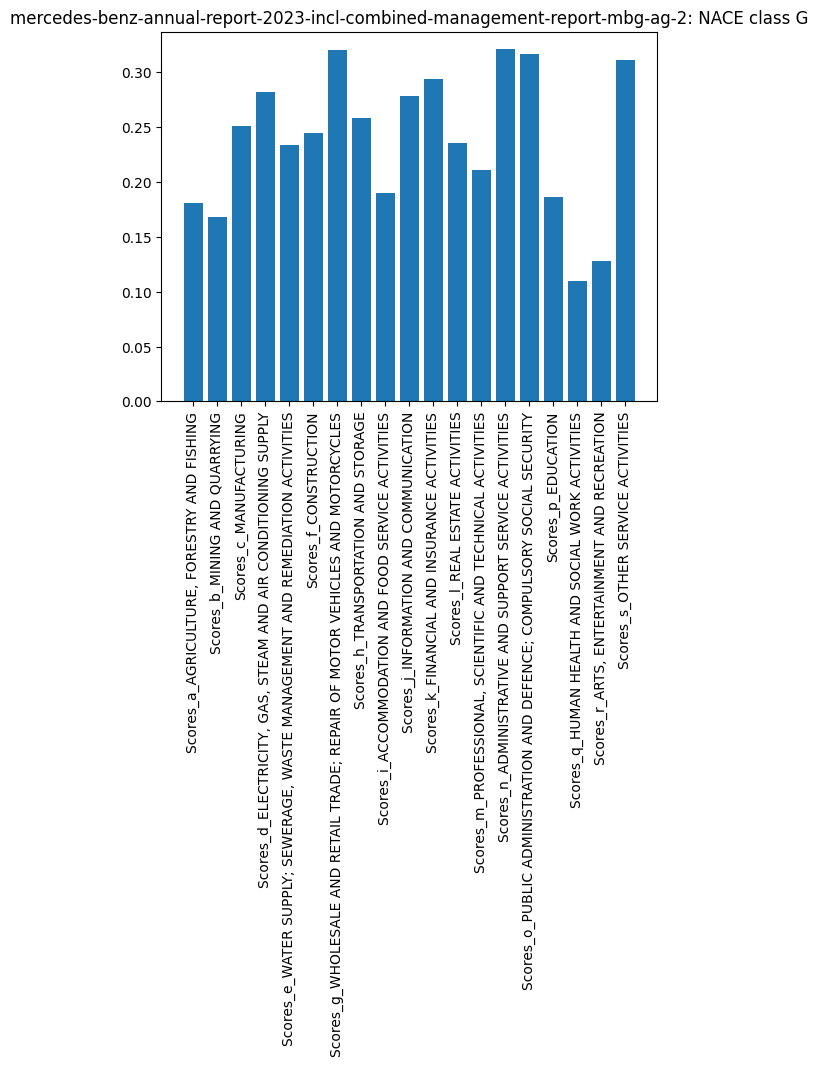

In [12]:
for i in range(len(df_paragraph_similarities)):
    plt.bar(df_paragraph_similarities[i][1].iloc[:,3:].columns, df_paragraph_similarities[i][1].iloc[:,3:].mean())
    plt.xticks(rotation=90)
    plt.title(f"{os.path.basename(df_paragraph_similarities[i][0])}: NACE class {NACE_codes[df_paragraph_similarities[i][0]+'.csv']}")
    plt.show()

### Visualize distributions

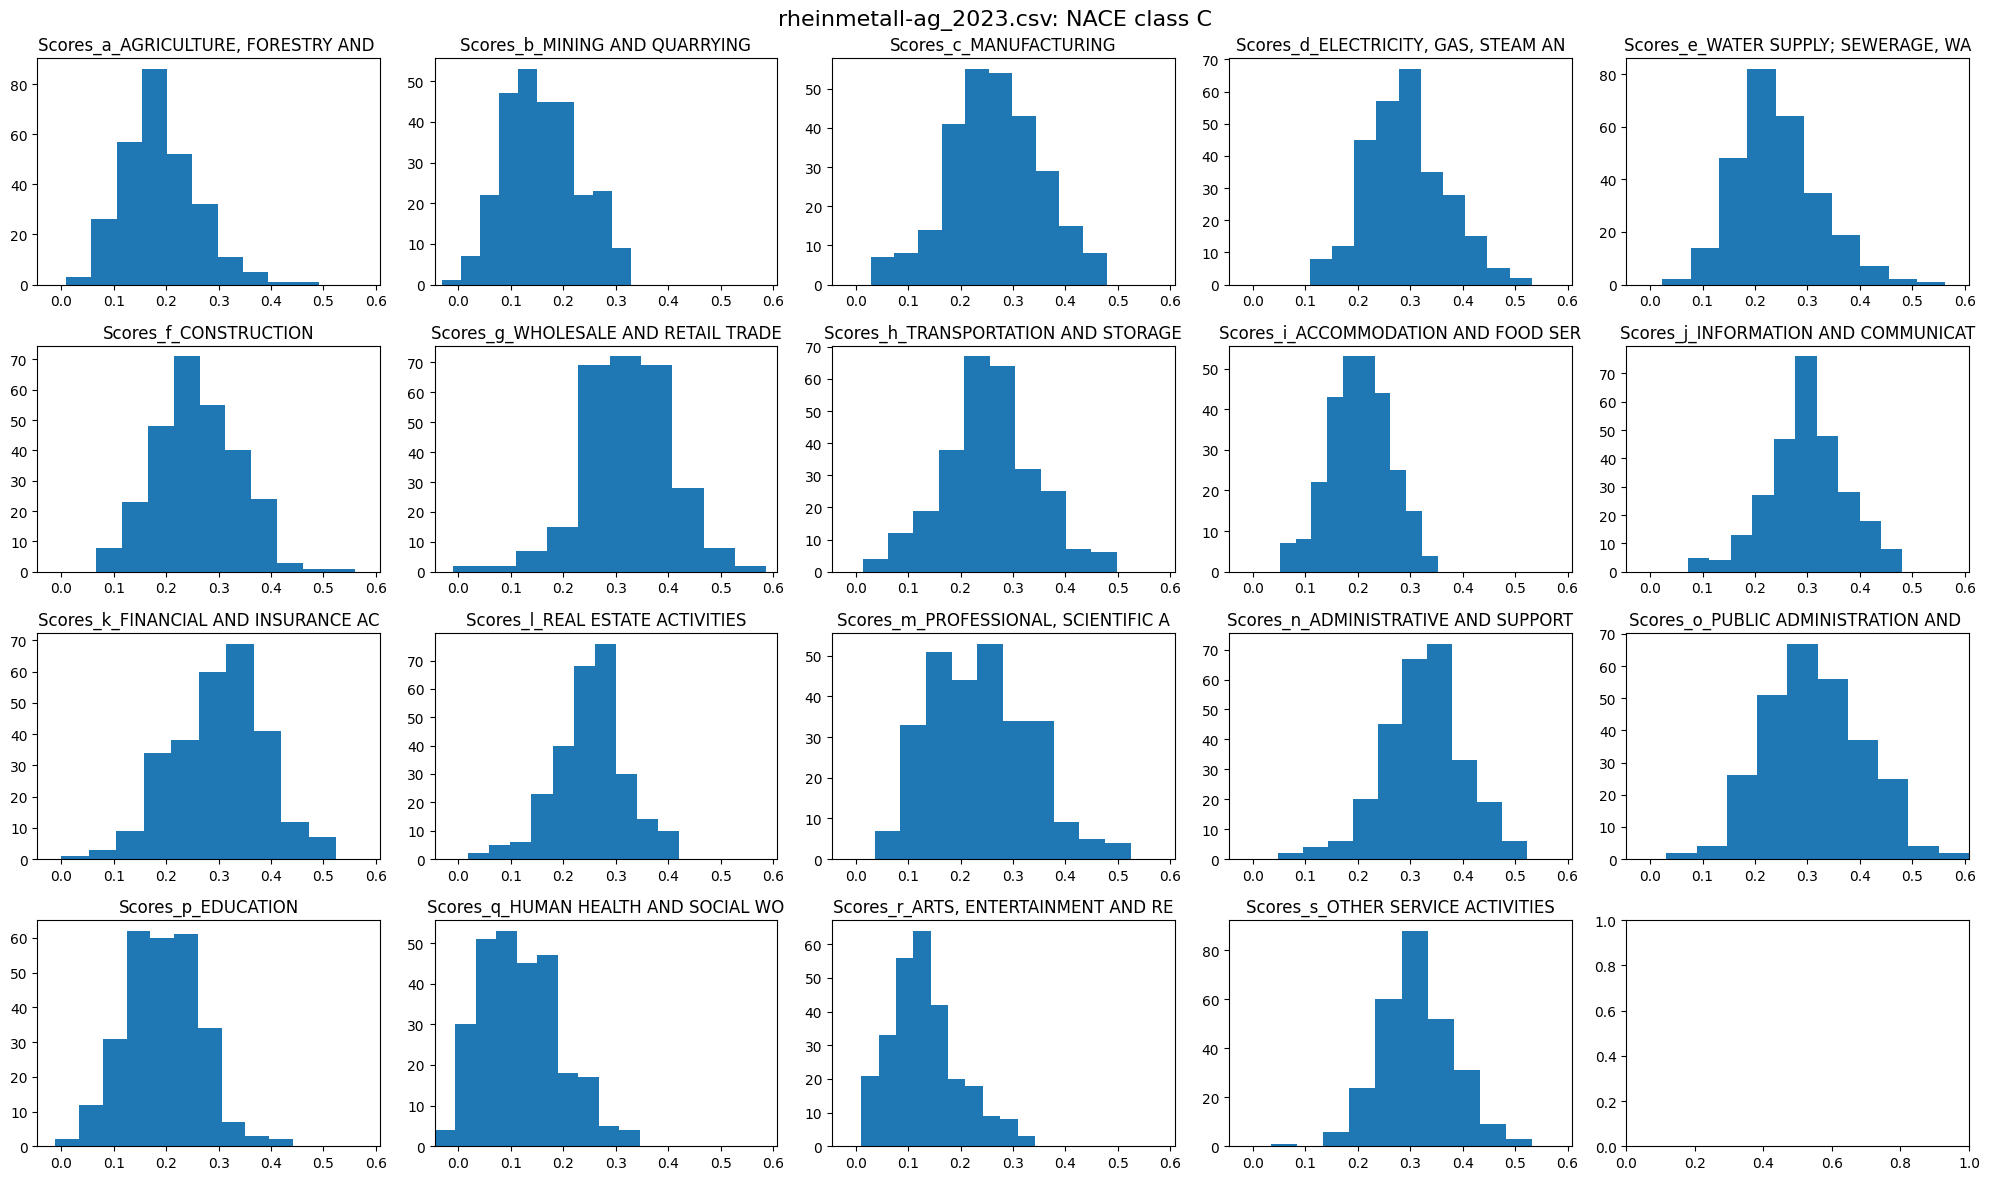

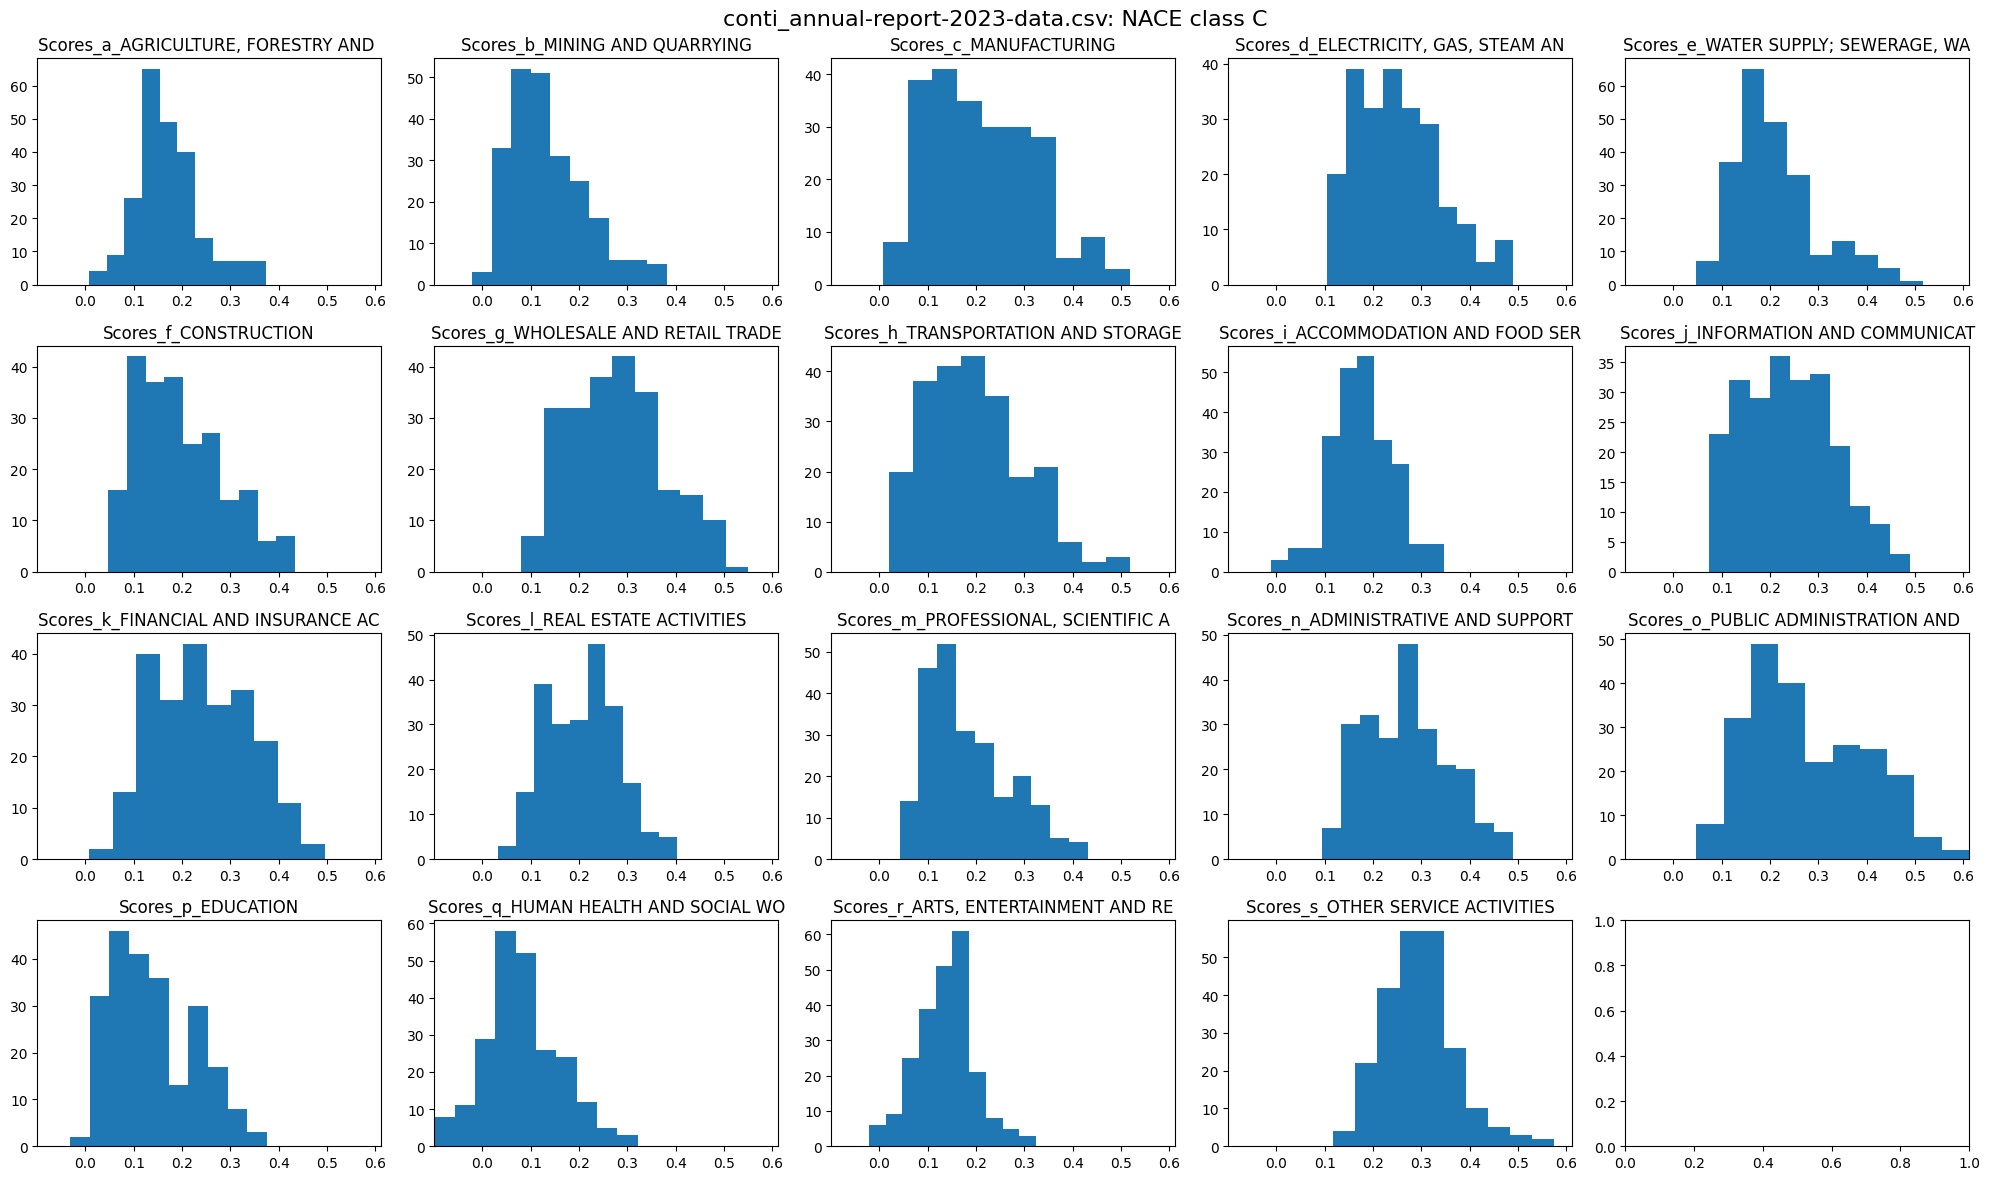

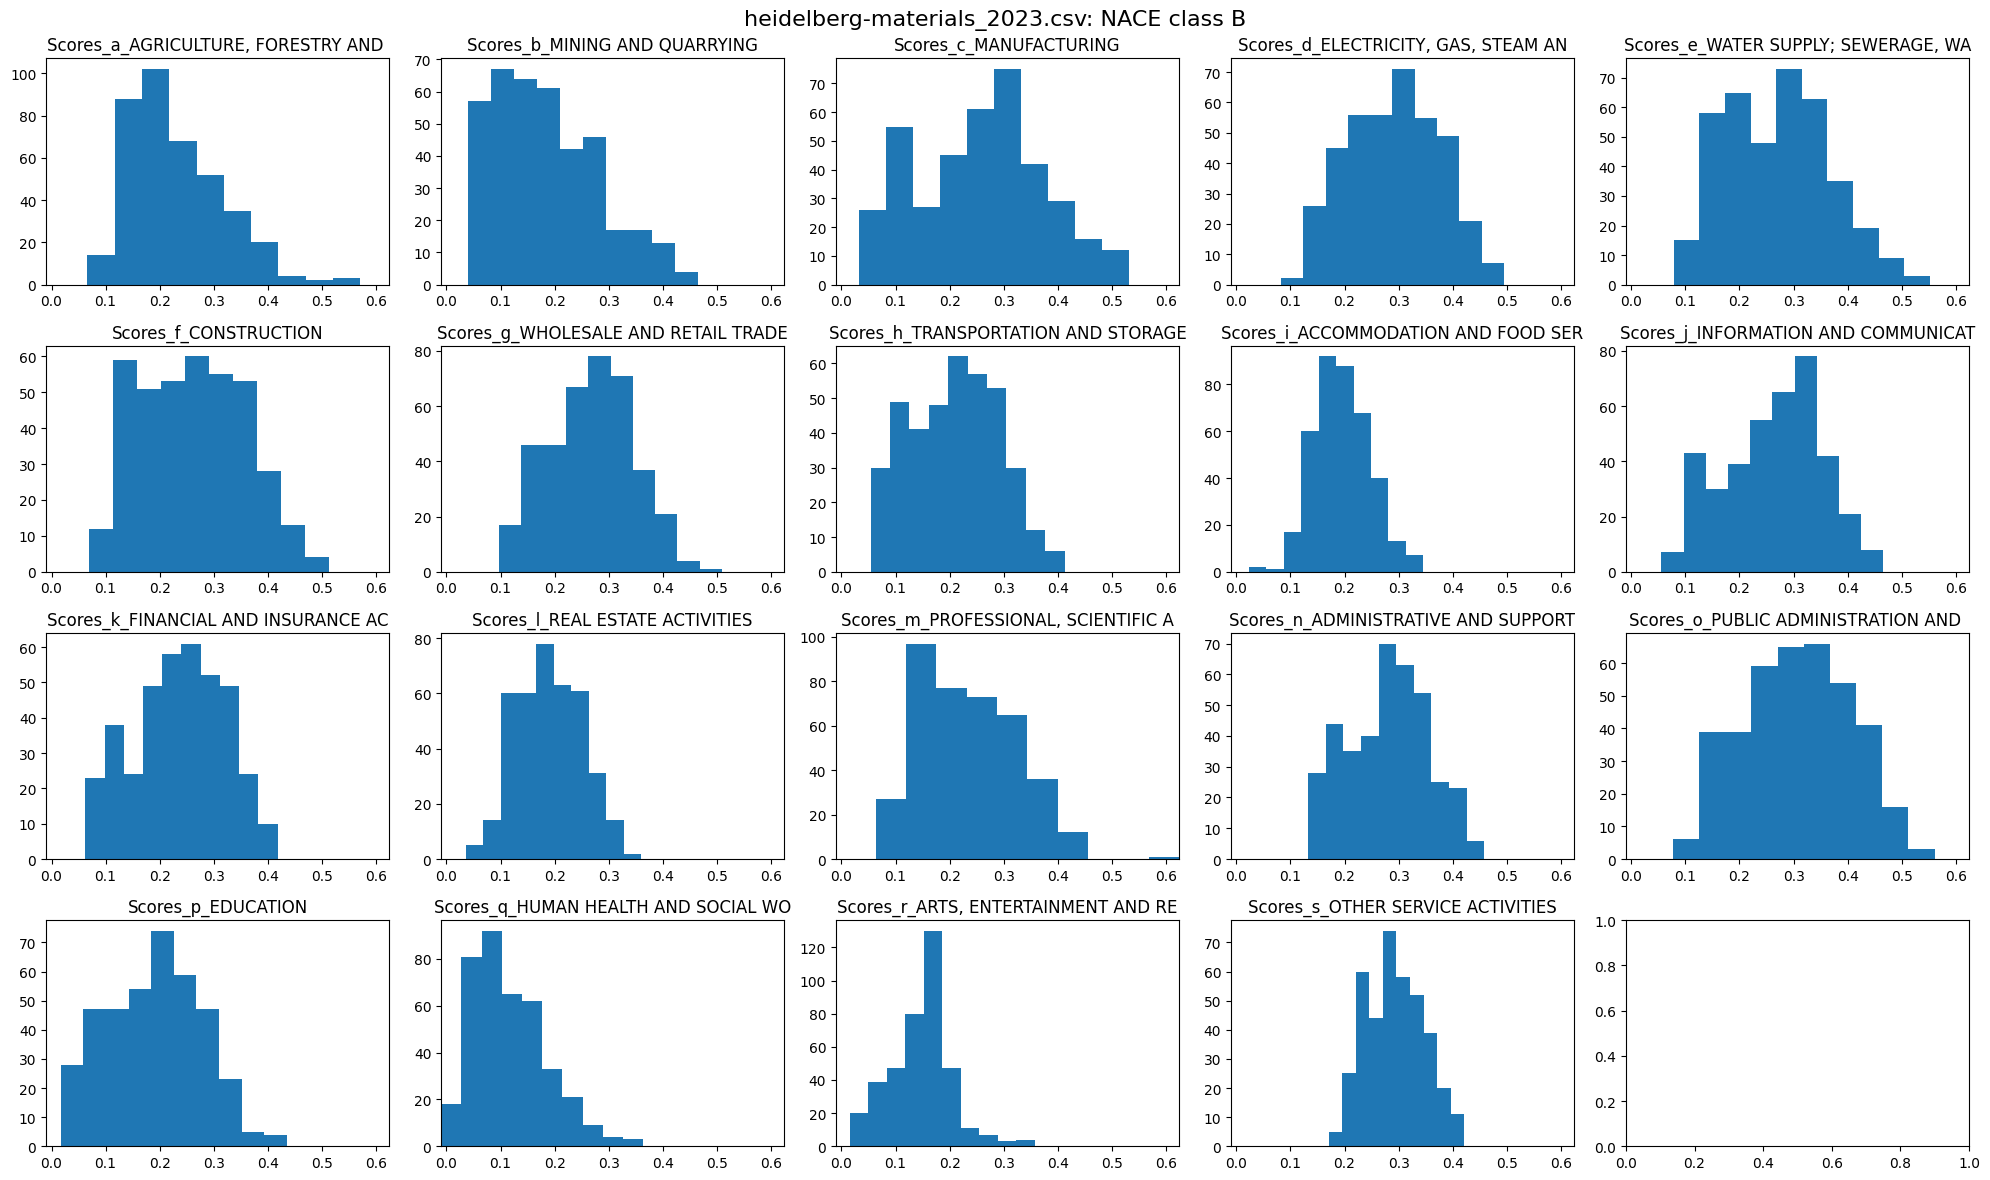

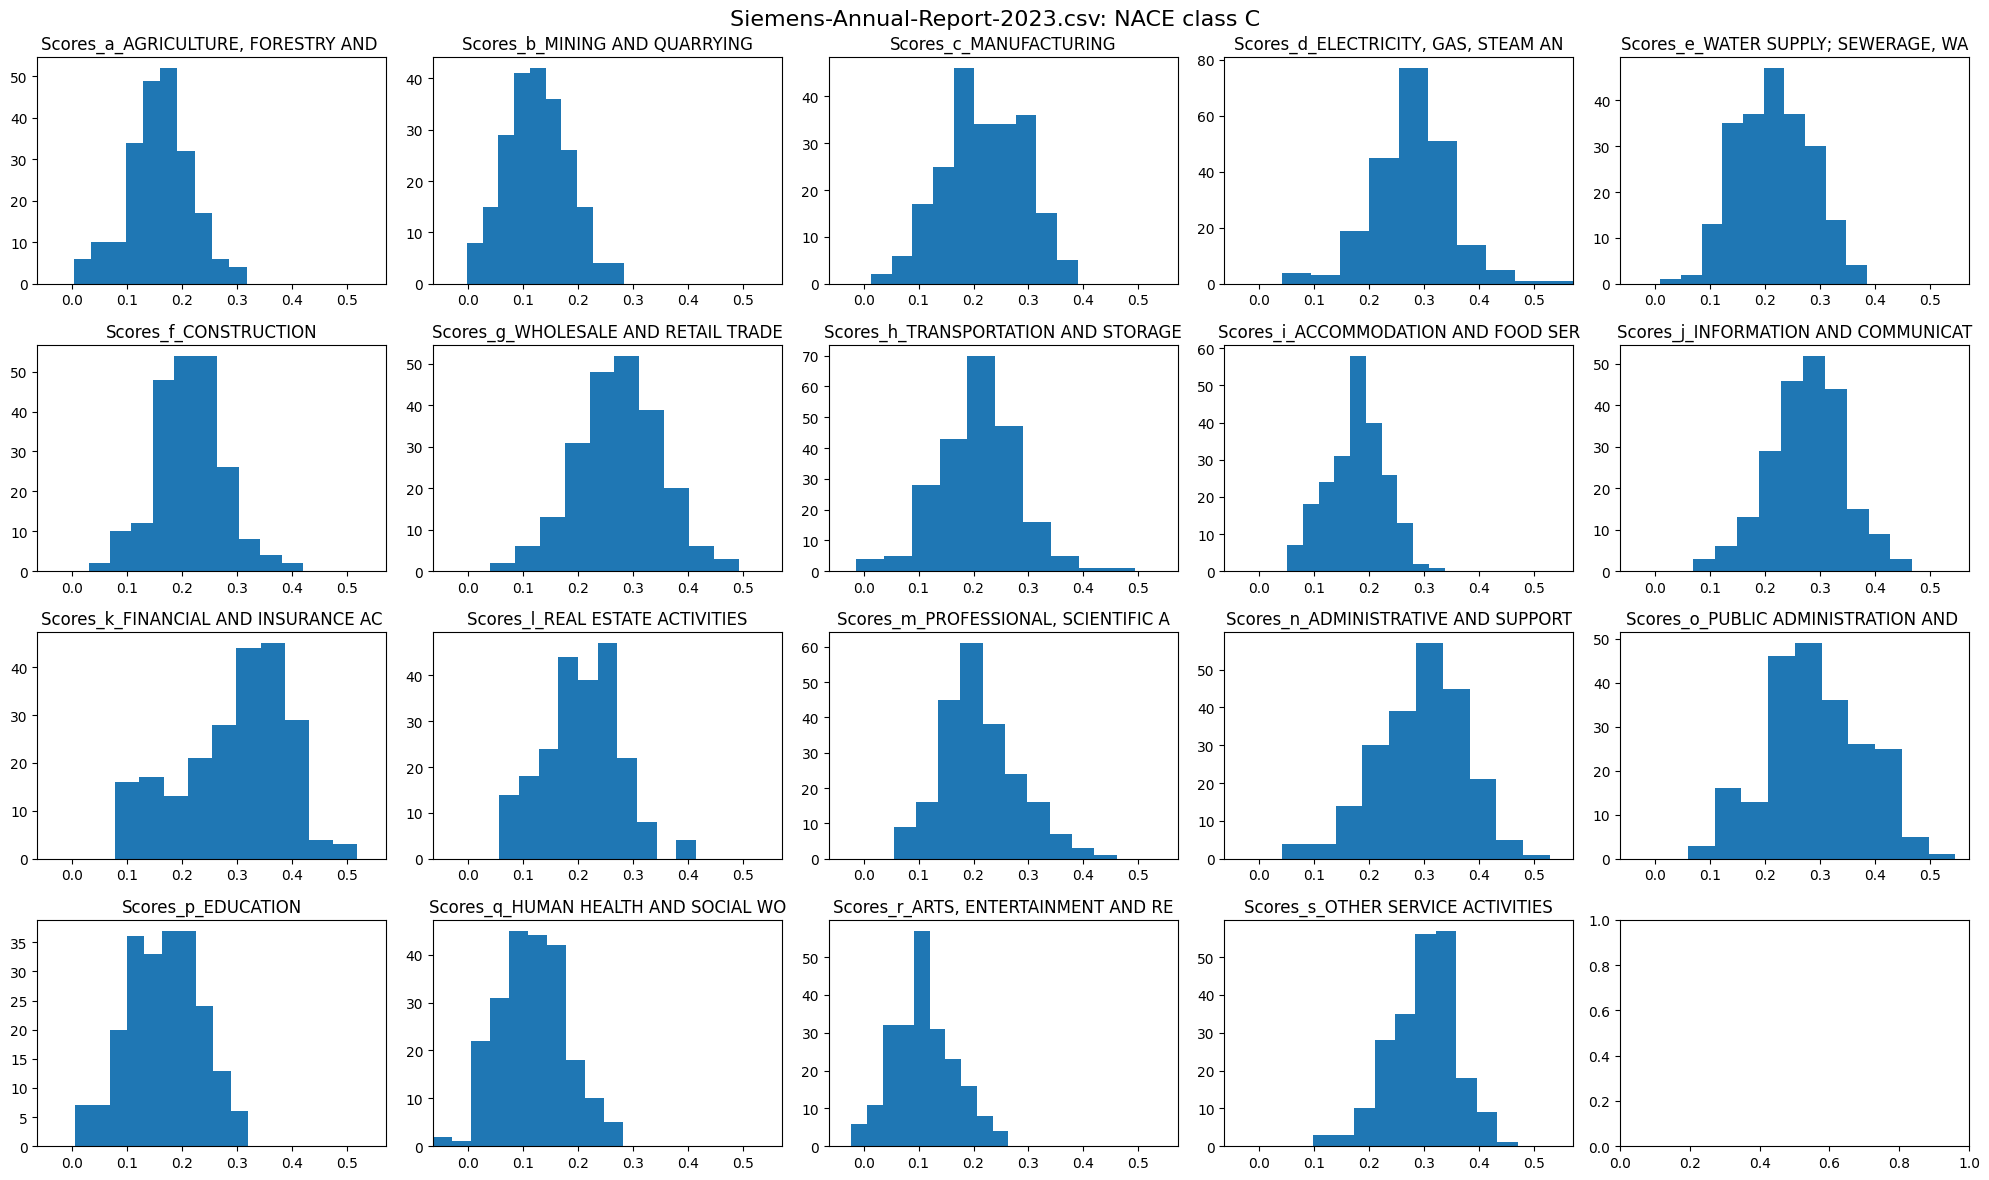

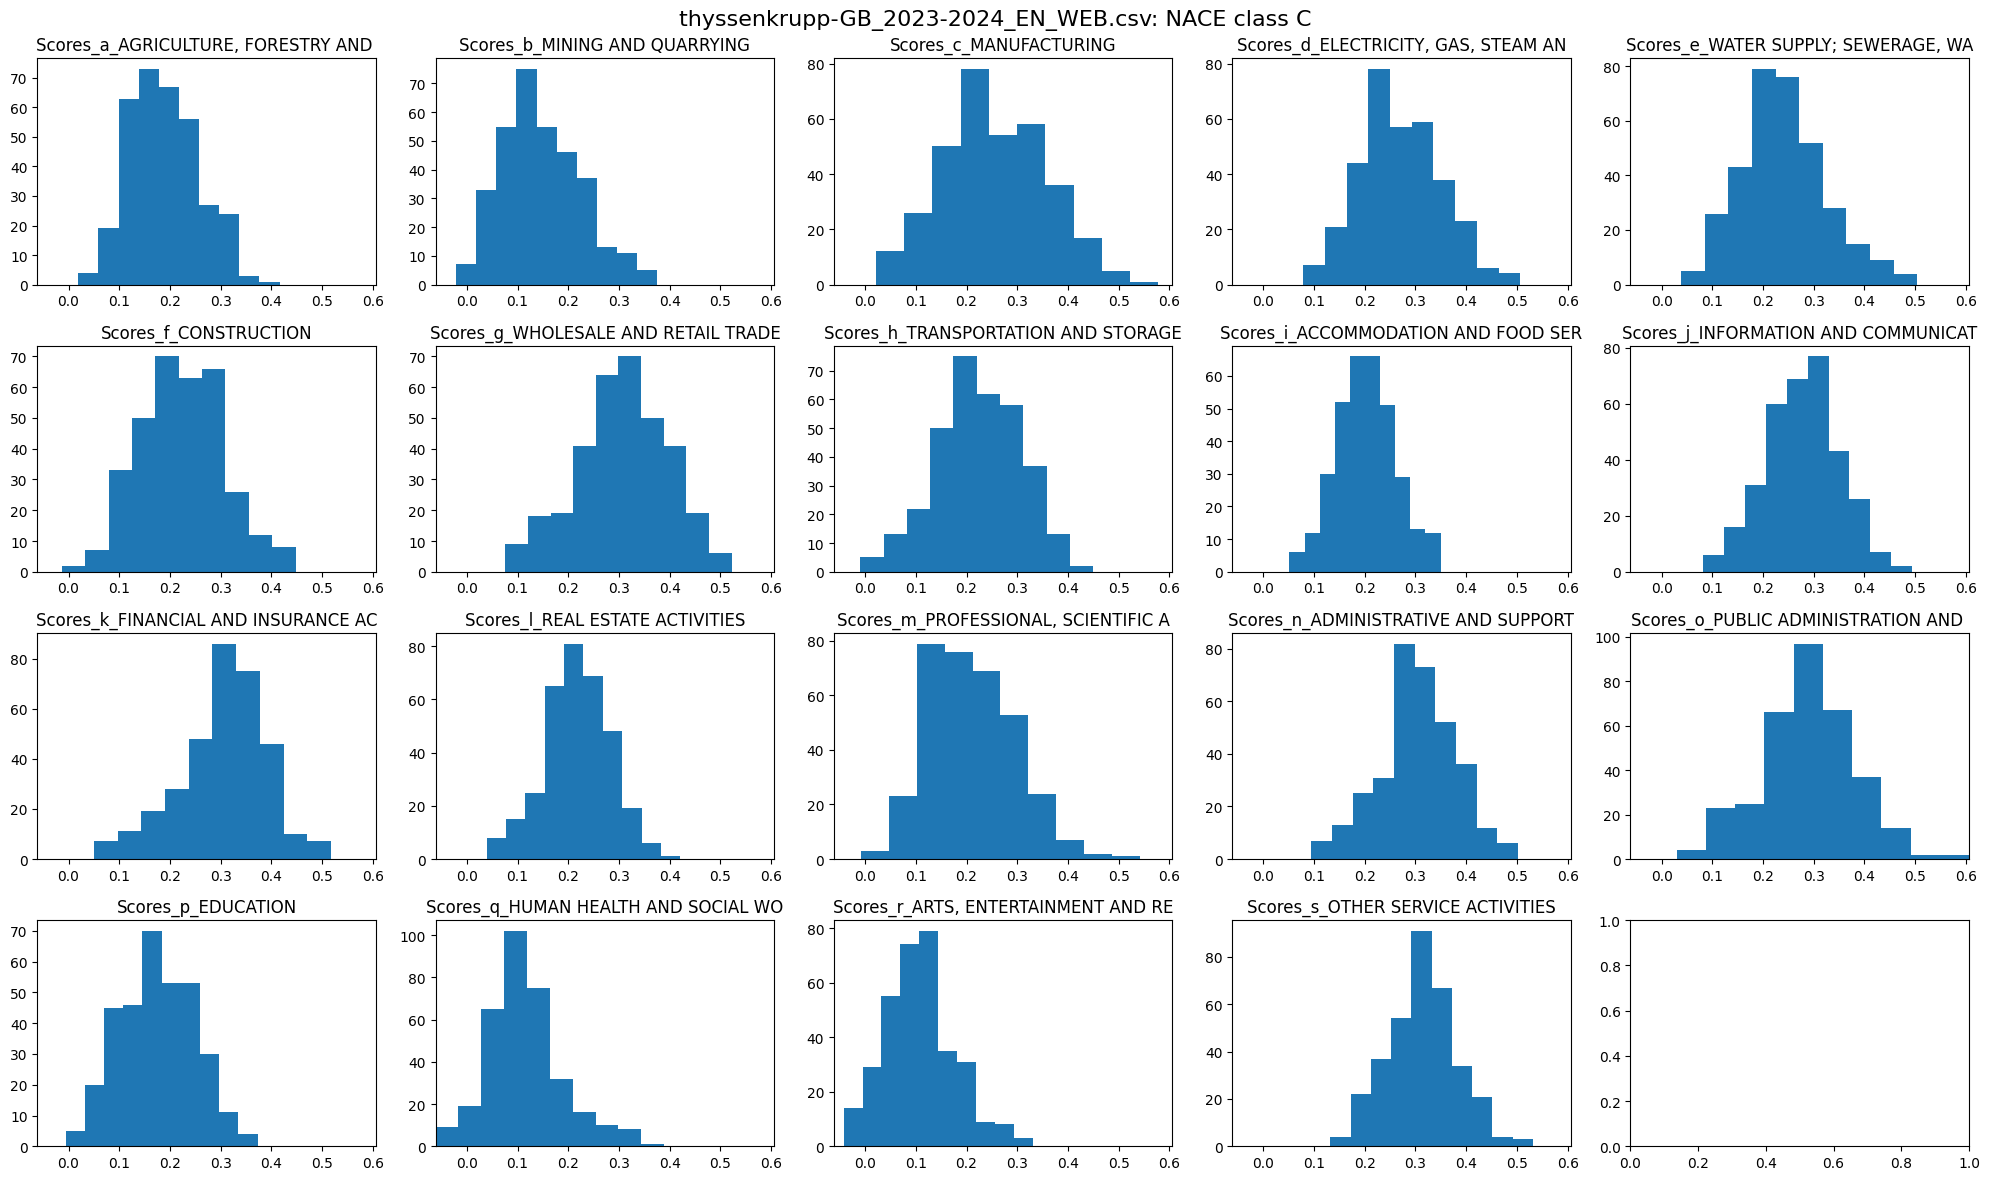

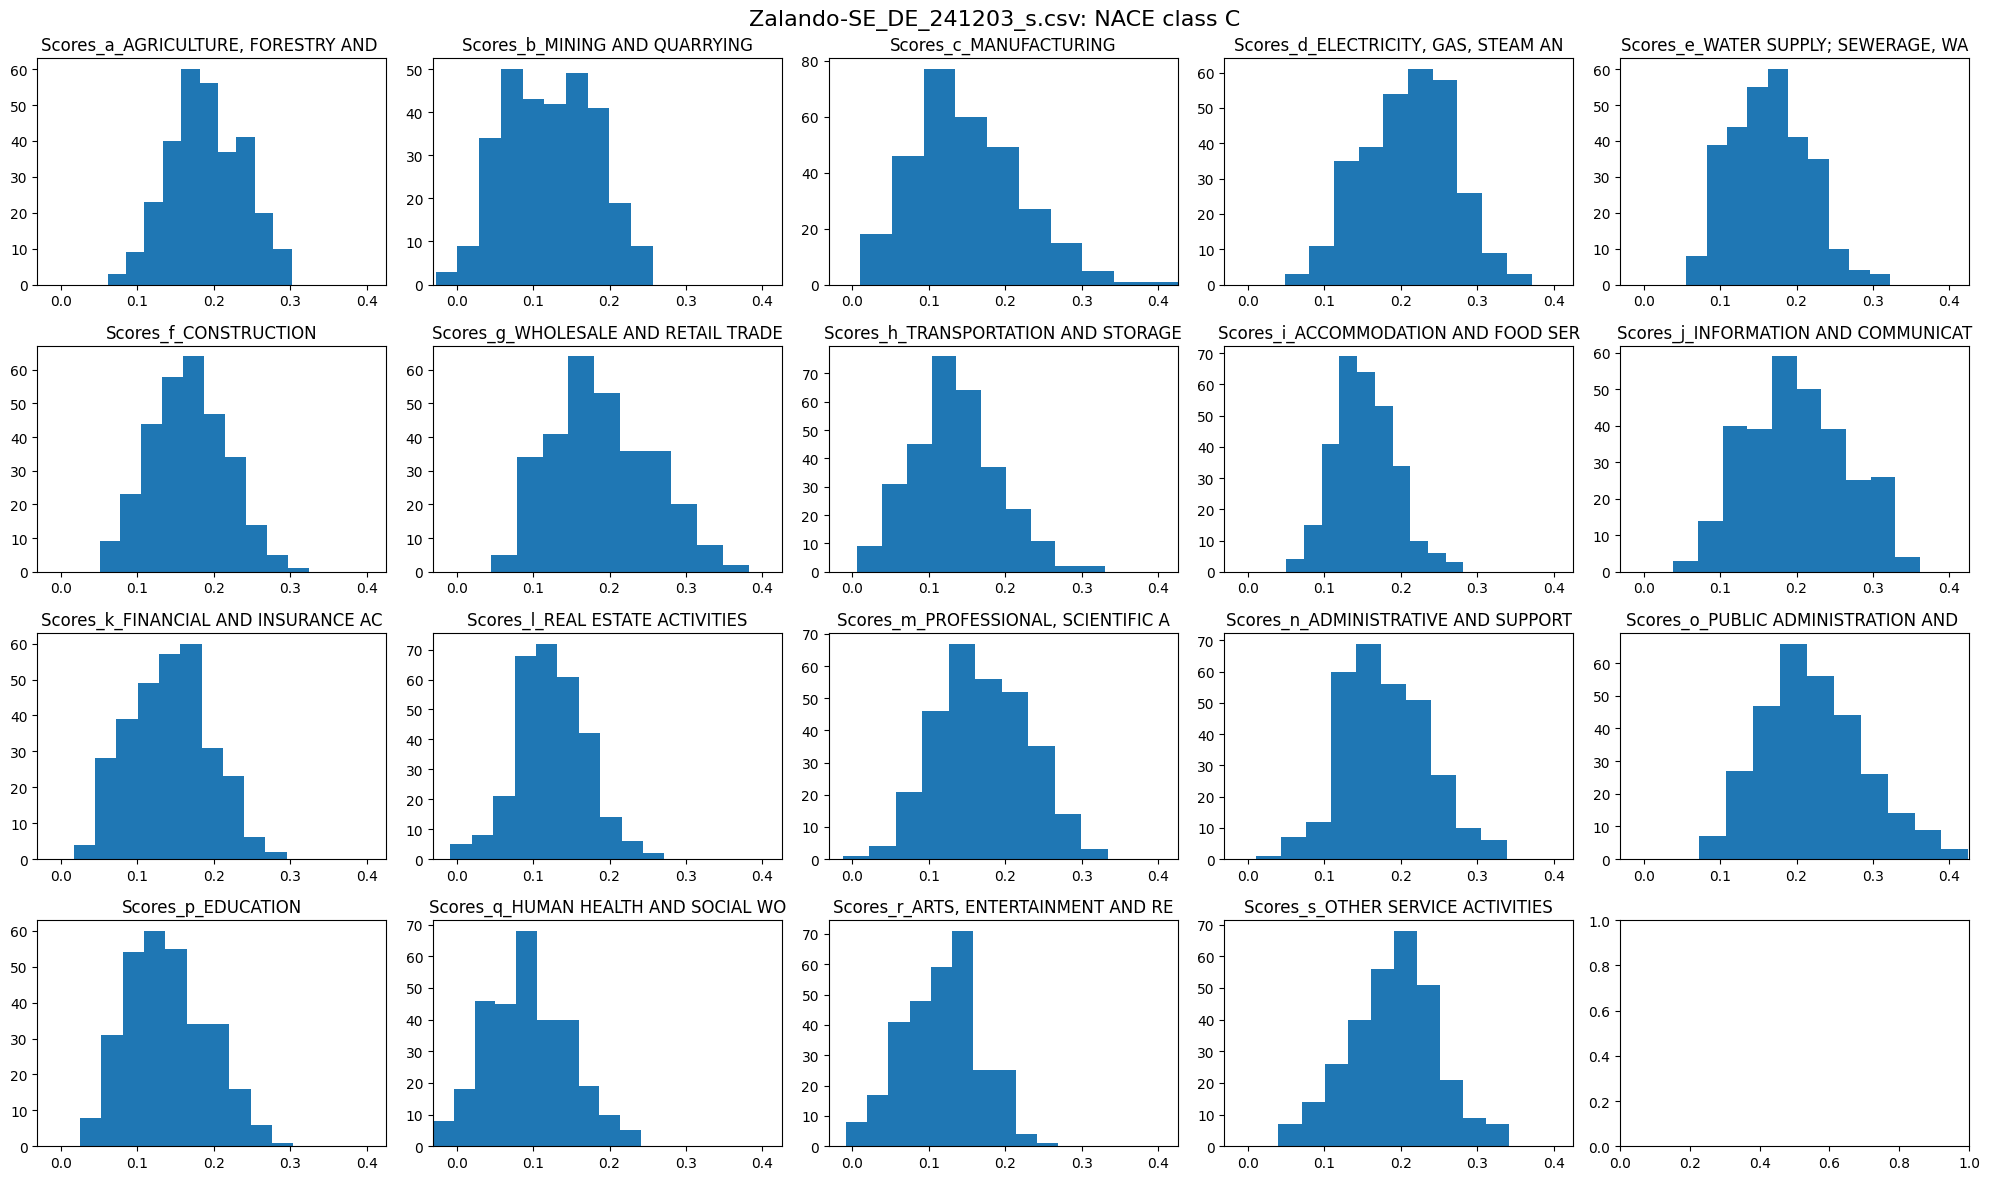

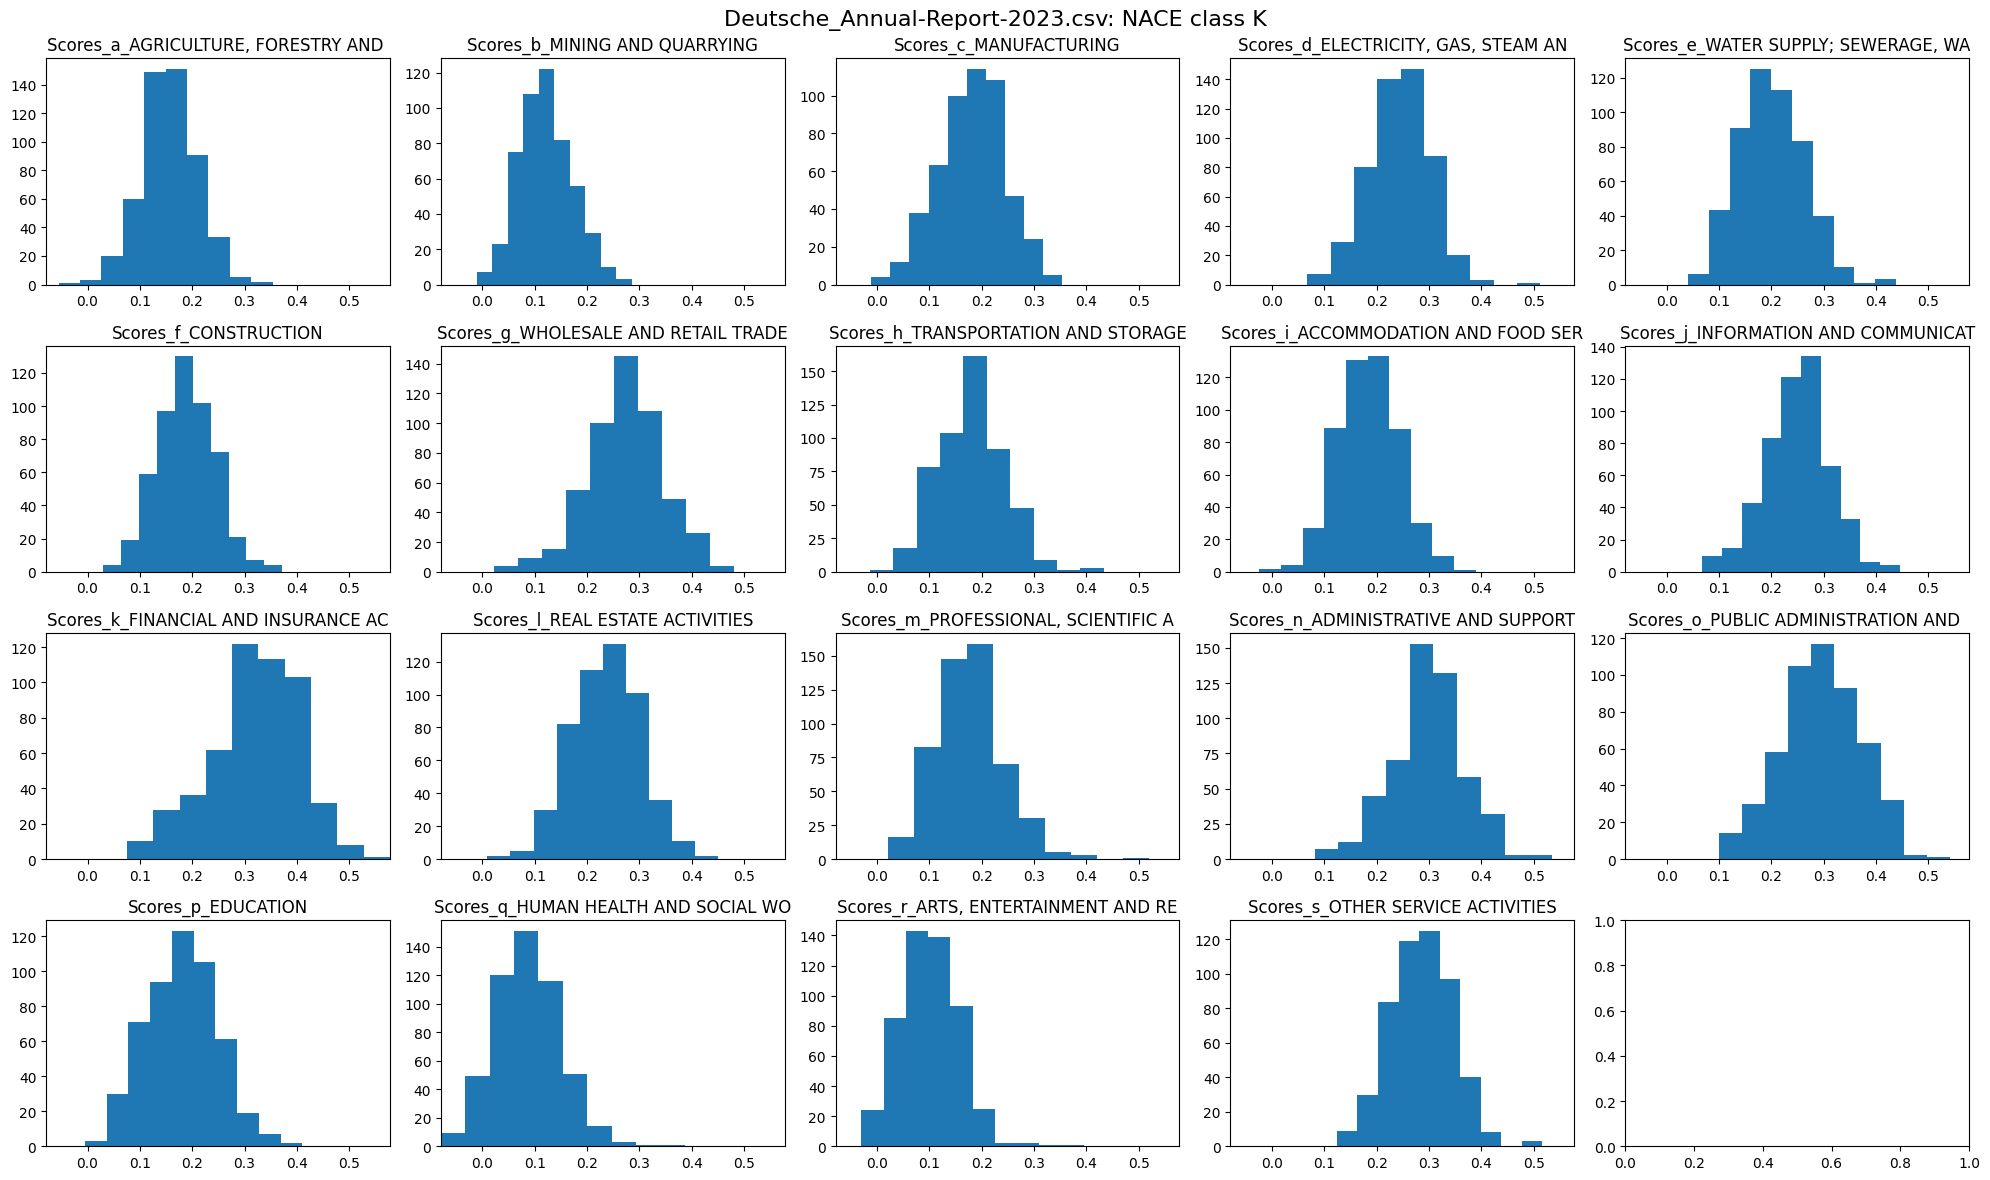

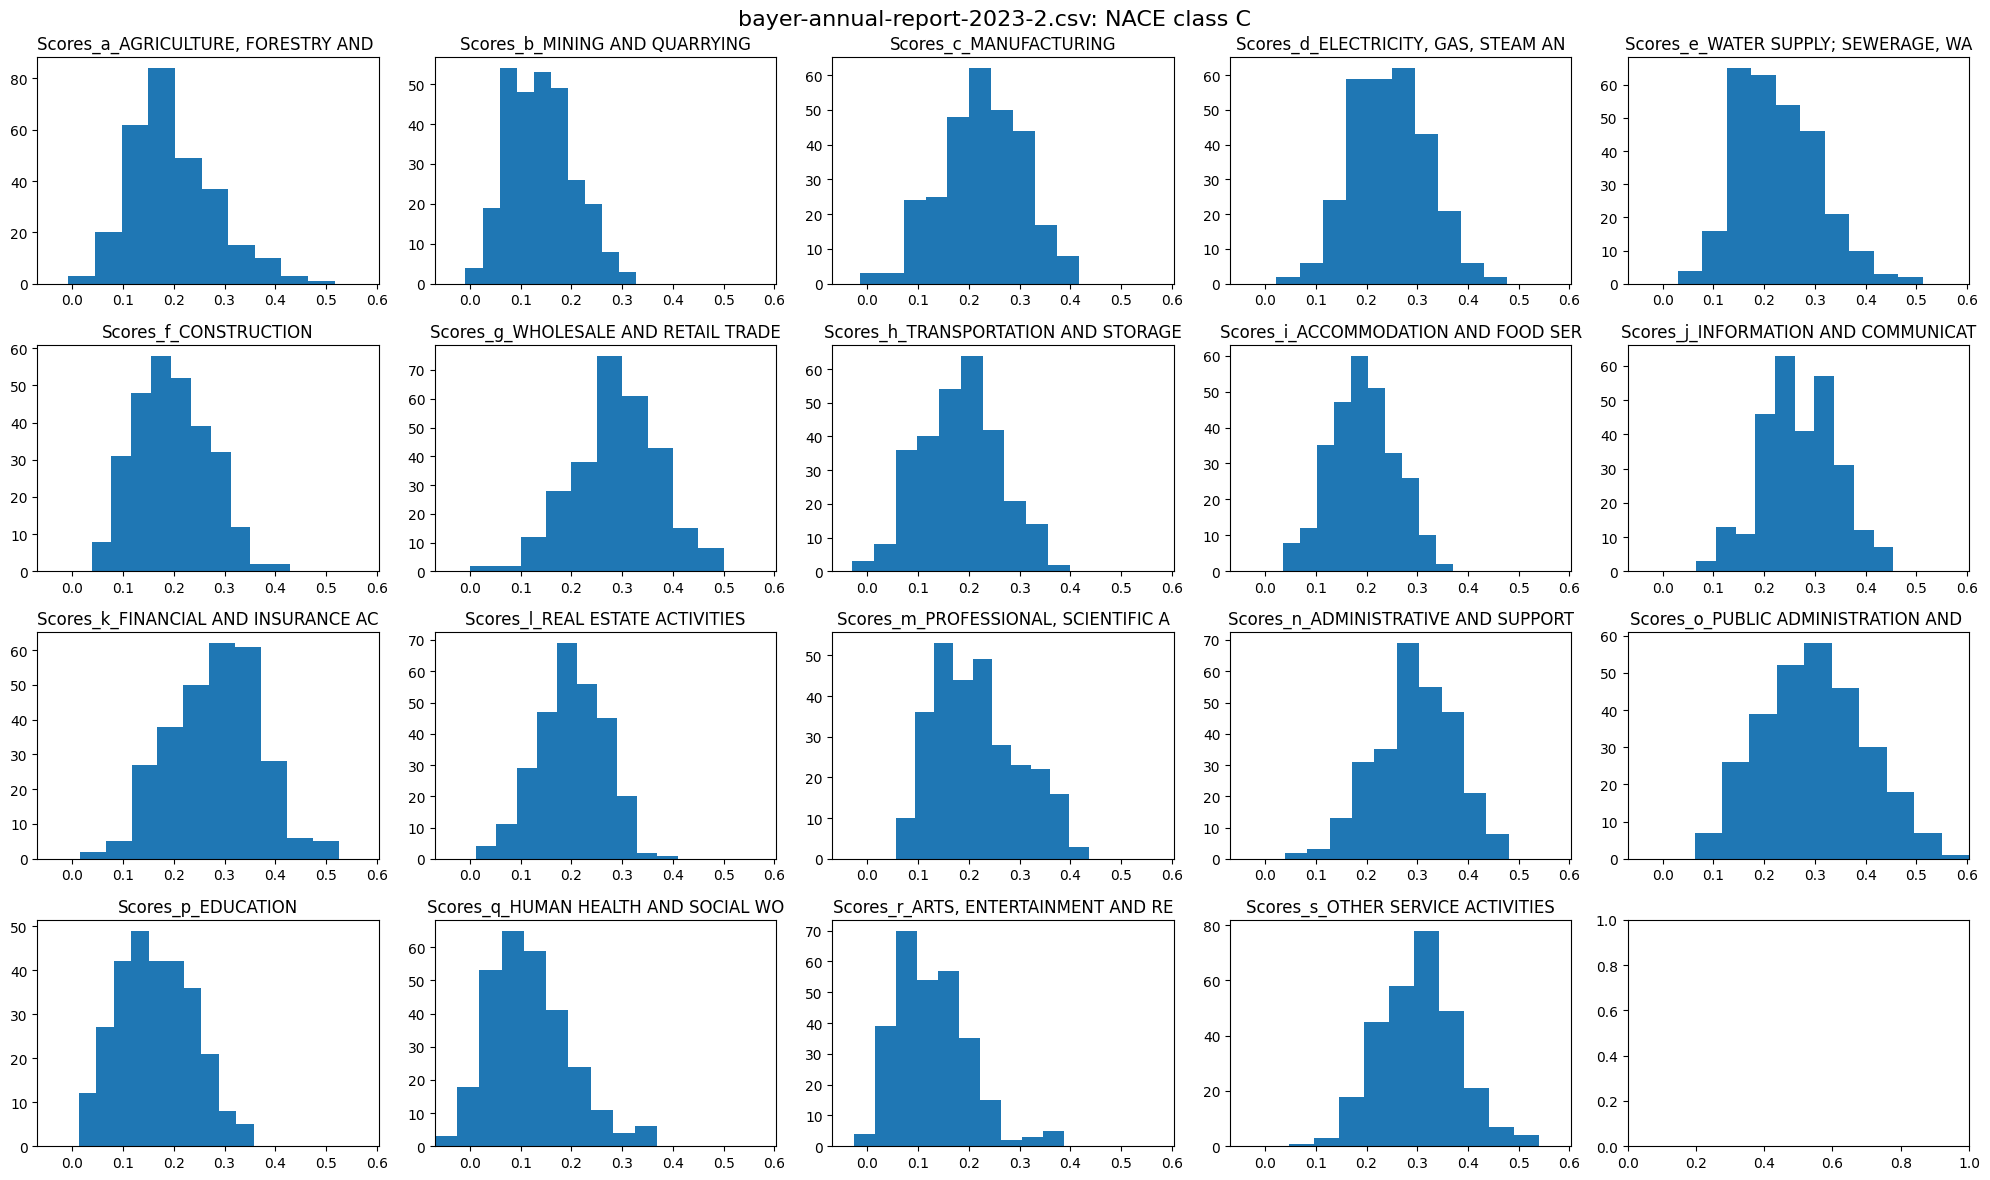

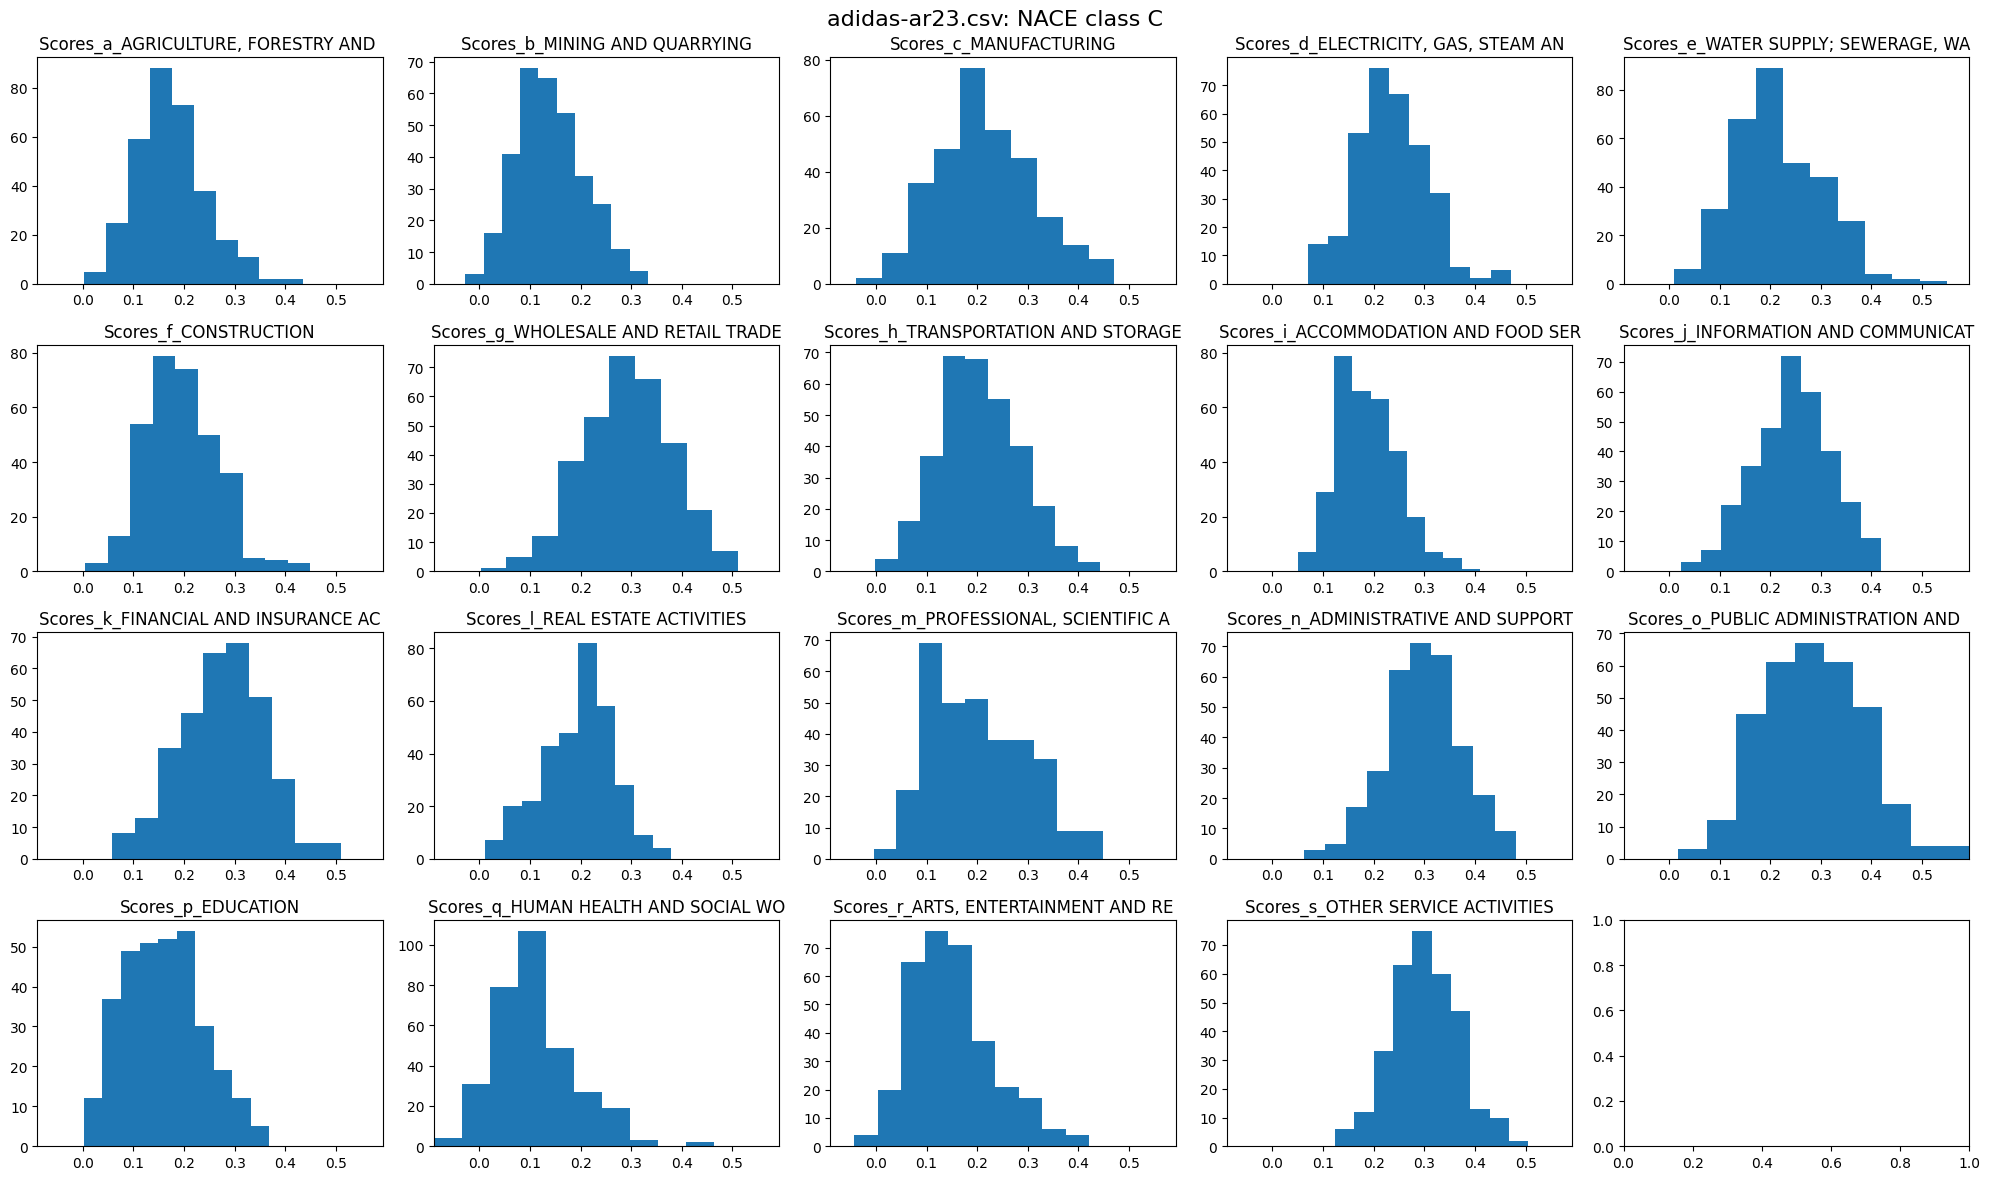

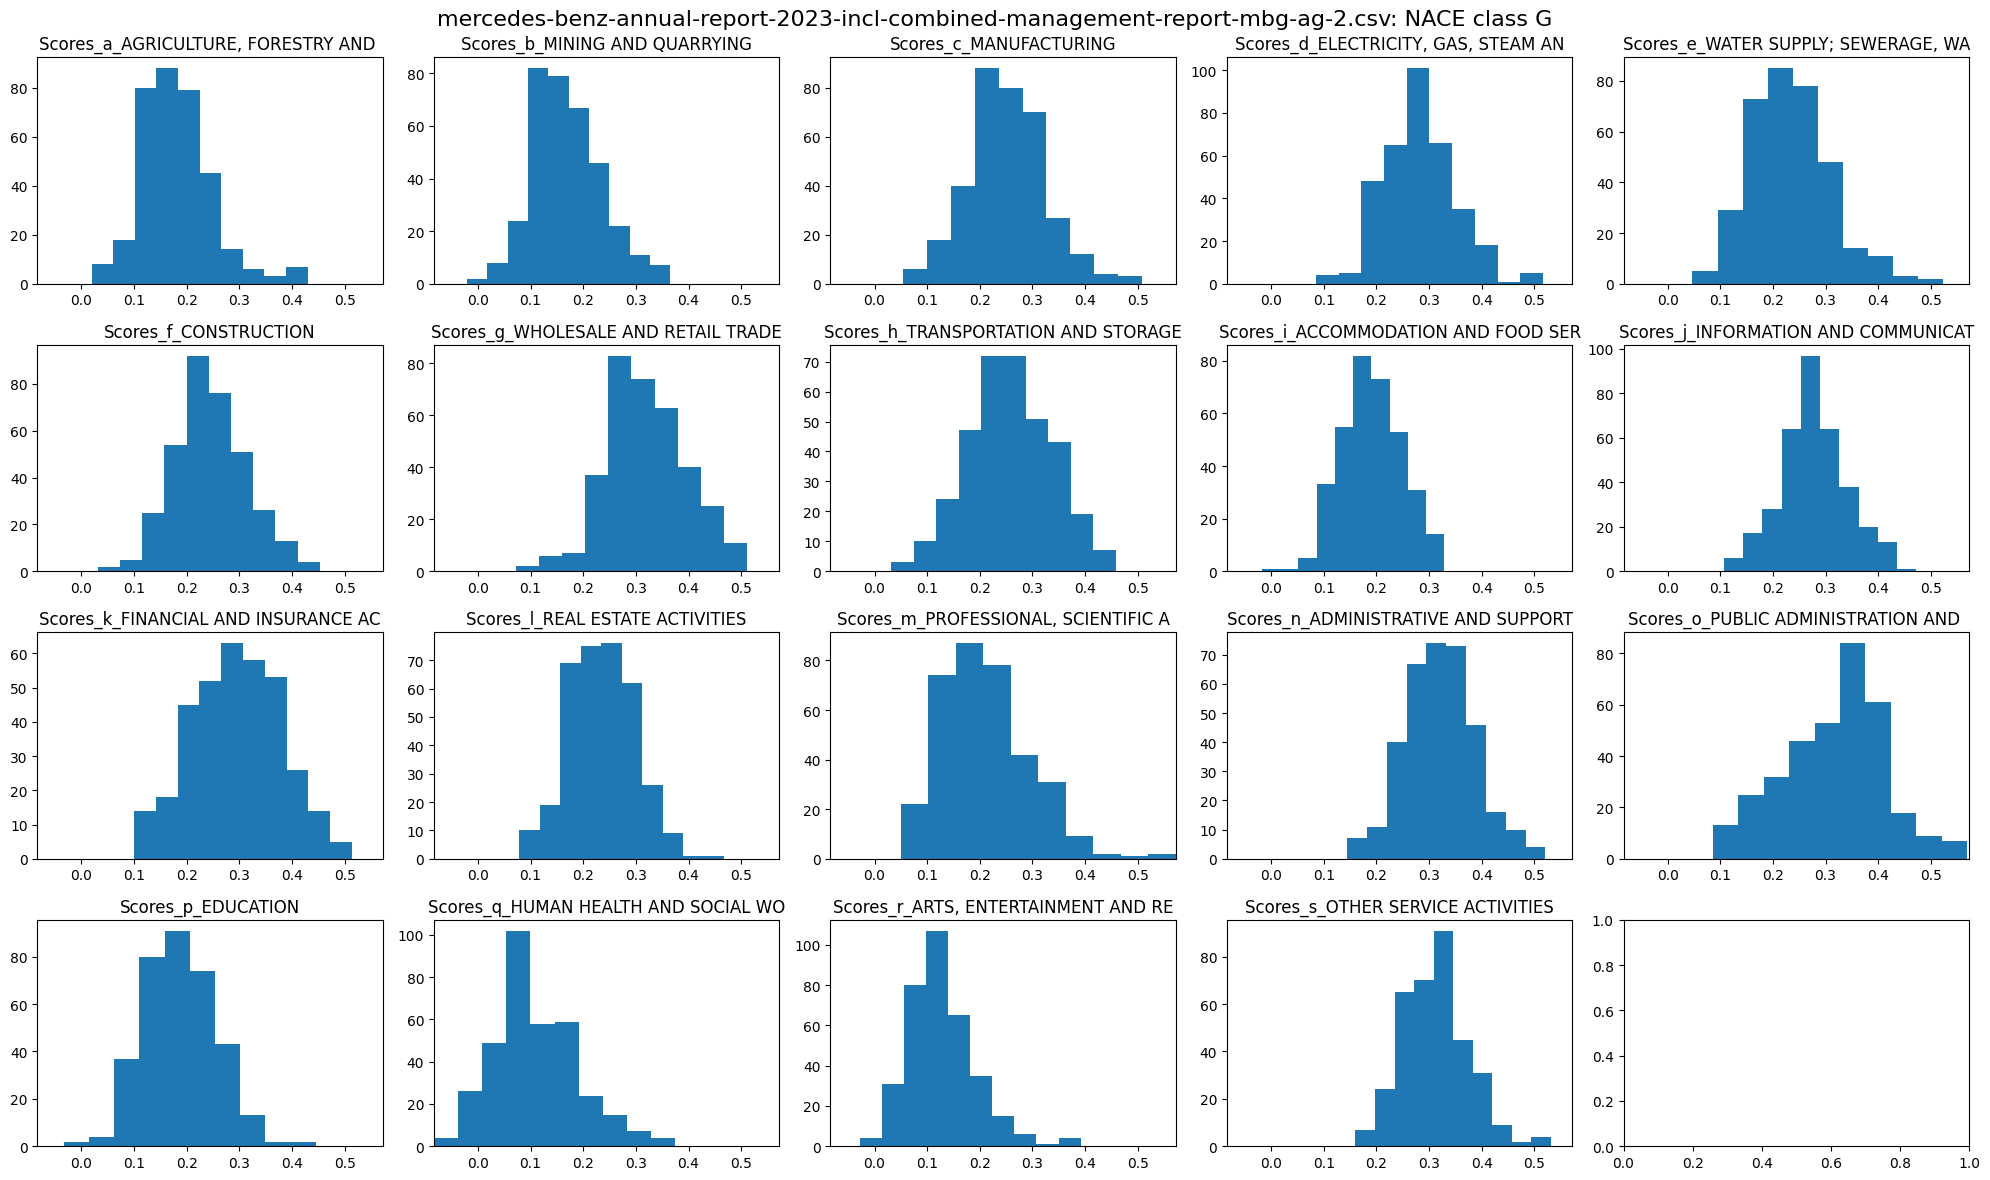

In [13]:
for j in range(len(df_paragraph_similarities)):
    fig, axes = plt.subplots(4, 5, figsize=(20, 12))
    axes = axes.flatten()

    min_x = df_paragraph_similarities[j][1].iloc[:,3:].min().min()
    max_x = df_paragraph_similarities[j][1].iloc[:,3:].max().max()

    for i in range(19):
        axes[i].hist(df_paragraph_similarities[j][1].iloc[:,3+i])
        axes[i].set_title(df_paragraph_similarities[j][1].iloc[:,3+i].name[:35])
        axes[i].set_xlim([min_x, max_x])

    fig.suptitle(f"{df_paragraph_similarities[j][0]}.csv: NACE class {NACE_codes[df_paragraph_similarities[j][0]+'.csv']}", fontsize=16)
    plt.tight_layout()
    plt.show()

In [18]:
print(df_paragraph_similarities[0][0])
print(df_paragraph_similarities[0][1].iloc[:, [1, 5]].sort_values(df_paragraph_similarities[0][1].columns[5], ascending=False).iloc[1]["Paragraphs"])

rheinmetall-ag_2023
letter to shareholders  combined management report  consolidated financial statement  further information  
 risks and op portunities    
 significant corporate risks    
 rheinmetall  annual report   monitoring of the  production processes in conjunction with flexible working hour models. continuous 
improvement in production  for example by simplifying processes or increasing the level of automation  helps 
to further increase production efficiency. the availability o f production plants is ensured through preventive 
maintenance with accompanying checks and through investments and modernizations.  
production may also be impacted by factors such as natural disasters disruptions in the infrastructure delivery 
stops or te chnical failure. as a countermeasure rheinmetall operates appropriate business continuity 
management bcm. for potential damage and associated interruptions to operations or production downtime 
and for other conceivable loss occurrences and liab